# Lab 2

**Zya Woodfork**

**March 28, 2025**

In [760]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline, interp1d
from scipy.integrate import quad

In [761]:
# Constants
G = 6.6743*10**-11 #m^3/kg/s^2
g0 = 9.81 #m/s^2
Me = 5.972*10**24 #kg
Mm = 7.35*10**22 #kg
Re = 6378.1*1000 #m
Rm = 1738.1*1000 #m
rotE = 7.272*10**-5 #rad/s

### Part 1
---

In [762]:
y = 4000 #m
a = G*Me/(Re**2)

t1 = np.sqrt(2*y/(a))
print(f"Time to reach bottom of 4km shaft with no drag = {t1}s")

Time to reach bottom of 4km shaft with no drag = 28.57416552900485s


$\frac{dv}{dt} = -g -\alpha(v^\gamma)$


$\frac{dy}{dt} = v$

In [763]:
def dvdt(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -g0
    return np.array((dydt, dvdt))

# Initial and final t values
t0 = 0 # s
tf = t1 # s

# initial conditions
s0 = [0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.726e-02 ...  2.852e+01  2.857e+01]
        y: [[ 0.000e+00 -1.608e-02 ... -3.989e+03 -4.005e+03]
            [ 0.000e+00 -5.617e-01 ... -2.798e+02 -2.803e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


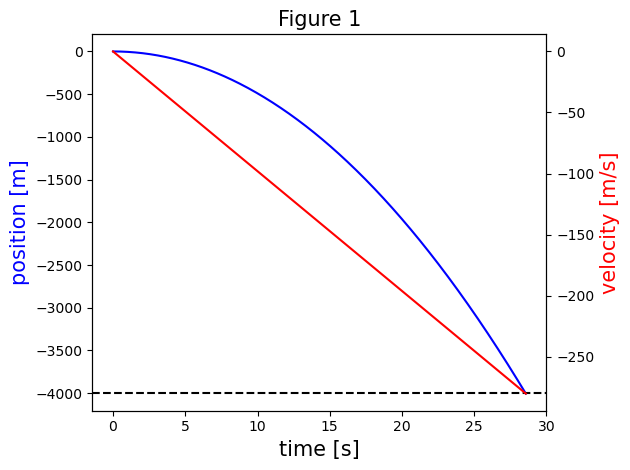

In [764]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

ax1.plot(soln.t, soln.y[0], "-", label="position", c="blue")
ax2.plot(soln.t, soln.y[1], "-", label="velocity", c="red")
ax1.axhline(-4000, color='black', ls = "--")

ax1.set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1.set_xlabel("time [s]", fontsize=15)
ax2.set_title("Figure 1", fontsize=15)

fig.tight_layout()

fig.savefig("Fig 1")

In [716]:
def event(t,s):
    return s[0] + 4000


soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event)
events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"The mass hits the bottom of the shaft with no drag at {events[0]} seconds")

The mass hits the bottom of the shaft with no drag at 28.556862458541293 seconds


### Part 2
---

In [717]:
def dvdt(t, s):
    y = s[0]
    v = s[1]
    r = s[0] + Re
    dydt = v
    dvdt = -g0*(r/Re)
    return np.array((dydt, dvdt))


# Initial and final t values
t0 = 0 # s
tf = t1 # s

# initial conditions
s0 = [0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.726e-02 ...  2.852e+01  2.857e+01]
        y: [[ 0.000e+00 -1.608e-02 ... -3.988e+03 -4.004e+03]
            [ 0.000e+00 -5.617e-01 ... -2.797e+02 -2.803e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


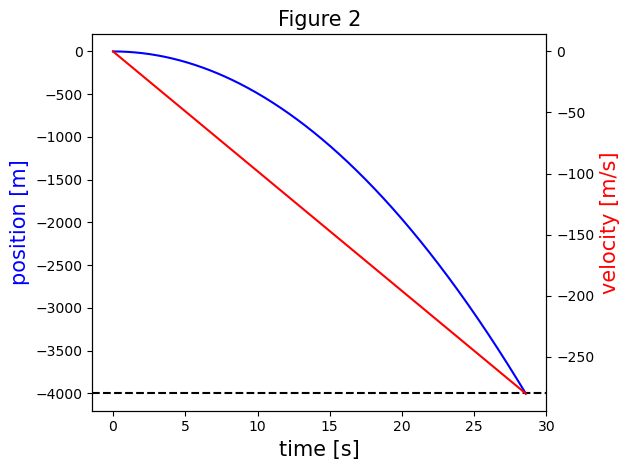

In [718]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

ax1.plot(soln.t, soln.y[0], "-", label="position", c="blue")
ax2.plot(soln.t, soln.y[1], "-", label="velocity", c="red")
ax1.axhline(-4000, color='black', ls = "--")

ax1.set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1.set_xlabel("time [s]", fontsize=15)
ax2.set_title("Figure 2", fontsize=15)

fig.tight_layout()
fig.savefig("Fig 2")

In [719]:
def event(t,s):
    return s[0] + 4000


soln = scipy.integrate.solve_ivp(fun = dvdt_2, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event)
events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"The mass hits the bottom of the shaft with time dependent g at {events[0]} seconds")

The mass hits the bottom of the shaft with time dependent g at 28.55835511204191 seconds


Incorporating a height-dependent g makes the object take longer to fall. As you get closer to the center of the Earth, there's less mass below you accelerating you towards the core so you take longer to fall.

In [720]:
gamma = 2
alpha = (a)/((np.abs(50))**gamma)

def dvdt(t, s):
    y = s[0]
    v = s[1]
    r = s[0] + Re
    dydt = v
    #print(f"alpha = {alpha}")
    
    dvdt = -a*(r/Re) + alpha*np.abs(dydt)**gamma
    return np.array((dydt, dvdt))


# Initial and final t values
t0 = 0 # s
tf = 100 # s

# initial conditions
s0 = [0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)

print(f"alpha = {alpha}")

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-01 ...  9.980e+01  1.000e+02]
        y: [[ 0.000e+00 -1.967e-01 ... -4.812e+03 -4.822e+03]
            [ 0.000e+00 -1.963e+00 ... -4.997e+01 -4.997e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 140
     njev: 0
      nlu: 0
alpha = 0.003919249086741722


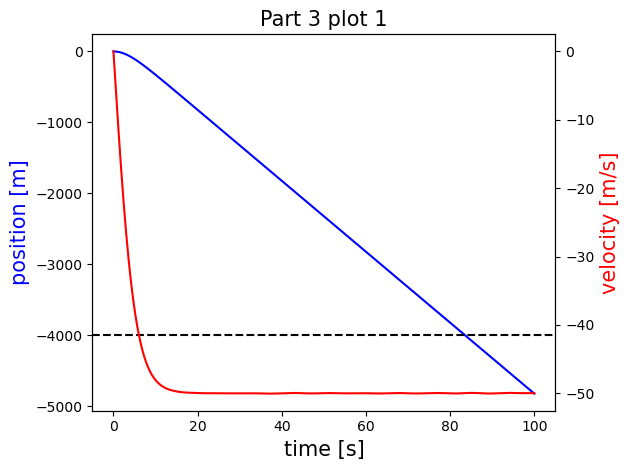

In [721]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

ax1.plot(soln.t, soln.y[0], "-", label="position", c="blue")
ax2.plot(soln.t, soln.y[1], "-", label="velocity", c="red")
ax1.axhline(-4000, color='black', ls = "--")

ax1.set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1.set_xlabel("time [s]", fontsize=15)
ax2.set_title("Part 3 plot 1", fontsize=15)

fig.tight_layout()

In [722]:
def event(t,s):
    return s[0] + 4000

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event)
events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"The mass hits the bottom of the shaft with drag and time dependent g at {events[0]} seconds")

The mass hits the bottom of the shaft with drag and time dependent g at 83.54624949346241 seconds


Including drag makes the object take much longer to fall.

### Part 3
---

In [731]:
mass = 1 #kg
omega = rotE

In [732]:
def dvdt(t, s):
    x = s[0]
    y = s[1]
    vx = s[2]
    vy = s[3]
    
    r = Re + y 
    
    dvdx = 2*omega*vy
    dvdy = -g0*(r/Re) - 2*omega*vx
    
    return [vx, vy, dvdx, dvdy]


# Initial and final t values
t0 = 0 # s
tf = 30 # s

# initial conditions
s0 = [0,0,0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.012e-02 ...  2.994e+01  3.000e+01]
        y: [[ 0.000e+00 -5.167e-08 ... -6.381e+00 -6.420e+00]
            [ 0.000e+00 -1.773e-02 ... -4.396e+03 -4.414e+03]
            [ 0.000e+00 -2.578e-06 ... -6.394e-01 -6.420e-01]
            [ 0.000e+00 -5.898e-01 ... -2.936e+02 -2.942e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


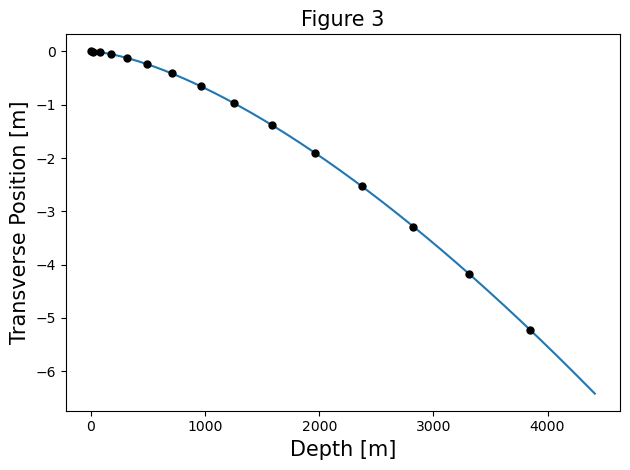

In [733]:
dot_interval = np.arange(0,30,2)
soln_dot = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = dot_interval)
dot_trans = soln_dot.y[0]
dot_depth = soln_dot.y[1]


fig, ax1 = plt.subplots(1,1)


x = soln.y[0]
y = soln.y[1]

ax1.plot(-y, x, "-")
ax1.plot(-dot_depth, dot_trans, " ", marker = "o", color = 'black', ms=5)
ax1.set_xlabel("Depth [m]", fontsize=15)
ax1.set_ylabel("Transverse Position [m]", fontsize=15)
ax1.set_title("Figure 3", fontsize=15)

fig.tight_layout()
fig.savefig("Fig 3")

In [734]:
def event(t,s):
    return s[1] + 4000


soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event)
events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"The mass hits the bottom of the shaft without drag at {events[0]} seconds")


def event2(t,s):
    return s[0] + 2.5

soln2 = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event2)
events2 = [soln2.t_events[0][0], soln2.y_events[0][0][0]]
print(f"The mass hits the side of the shaft without drag at {events2[0]} seconds")
print(f"The mass hits the side of the shaft without drag at a depth of {soln2.y_events[0][0][1]} m")

The mass hits the bottom of the shaft without drag at 28.55837564288955 seconds
The mass hits the side of the shaft without drag at 21.907103068412855 seconds
The mass hits the side of the shaft without drag at a depth of -2353.8665233532197 m


The mass hits the wall first.

In [735]:
def dvdt(t, s):
    x = s[0]
    y = s[1]
    vx = s[2]
    vy = s[3]
    
    r = Re + y 
    
    dvdx = 2*omega*vy
    dvdy = -g0*(r/Re) - 2*omega*vx + alpha*np.abs(vy)**gamma
    
    return [vx, vy, dvdx, dvdy]


# Initial and final t values
t0 = 0 # s
tf = 100 # s

# initial conditions
s0 = [0,0,0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e-01 ...  9.980e+01  1.000e+02]
        y: [[ 0.000e+00 -1.911e-06 ... -3.374e+01 -3.389e+01]
            [ 0.000e+00 -1.969e-01 ... -4.815e+03 -4.825e+03]
            [ 0.000e+00 -2.864e-05 ... -7.004e-01 -7.018e-01]
            [ 0.000e+00 -1.965e+00 ... -4.999e+01 -4.999e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 140
     njev: 0
      nlu: 0


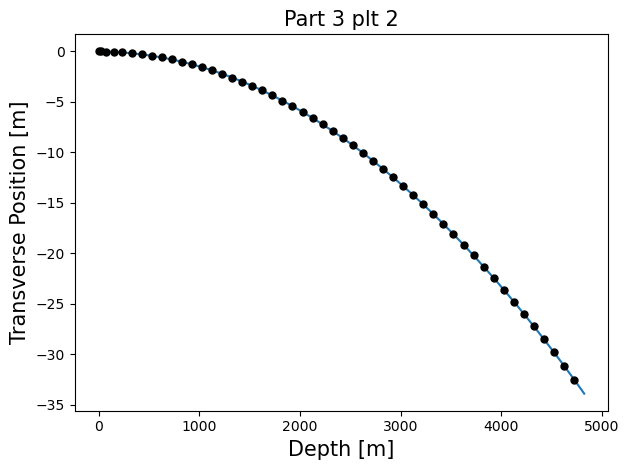

In [736]:
dot_interval = np.arange(0,100,2)
soln_dot = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = dot_interval)
dot_trans = soln_dot.y[0]
dot_depth = soln_dot.y[1]

fig, ax1 = plt.subplots(1,1)


x = soln.y[0]
y = soln.y[1]

ax1.plot(-y, x, "-")
ax1.plot(-dot_depth, dot_trans, " ", marker = "o", color = 'black', ms=5)
ax1.set_xlabel("Depth [m]", fontsize=15)
ax1.set_ylabel("Transverse Position [m]", fontsize=15)
ax1.set_title("Part 3 plt 2", fontsize=15)

fig.tight_layout()

Drag does make a difference. Mass takes longer to fall.

### Part 4
---

In [765]:
y = 2*Re #m
a = G*Me/(Re**2)

t4 = np.sqrt(2*y/(a))
print(f"Time to reach other side of Earth with no drag = {t4}s")

Time to reach other side of Earth with no drag = 1613.6309695921855s


In [738]:
def dvdt(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    r = y + Re
    dvdt = -g0*(r/Re)
    return np.array((dydt, dvdt))

# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [0,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e+01 ...  9.980e+03  1.000e+04]
        y: [[ 0.000e+00 -1.970e+03 ... -1.108e+05 -8.345e+04]
            [ 0.000e+00 -1.966e+02 ...  1.463e+03  1.270e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 146
     njev: 0
      nlu: 0


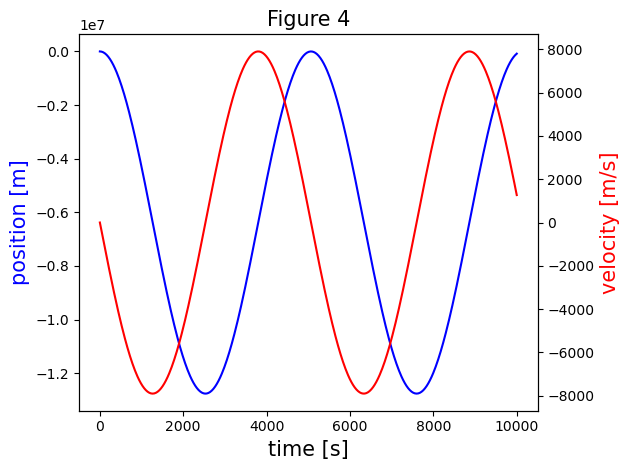

In [739]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()

ax1.plot(soln.t, soln.y[0], "-", label="position", c="blue")
ax2.plot(soln.t, soln.y[1], "-", label="velocity", c="red")

ax1.set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1.set_xlabel("time [s]", fontsize=15)
ax2.set_title("Figure 4", fontsize=15)

fig.tight_layout()
fig.savefig("Fig 4")

The velocity curve is the derivative of the position curve. The mass seems to oscillate between the two sides of Earth.

In [740]:
def event_other(t,s):
    return s[0] + 0.999*2*Re

def event_center(t,s):
    return s[0] + Re

#soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = (event_other, event_center), rtol=1e-10, atol = 1e-12)
soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event_center, rtol=1e-10, atol = 1e-12)

events_center = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"The mass reaches the center of Earth with no drag at {events_center[0]} seconds with a speed of {events_center[1]} m/s")


soln2 = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event_other, rtol=1e-10, atol = 1e-12)
events_side = [soln2.t_events[0][0], soln2.y_events[0][0][0]]
print(f"The mass reaches the other side of Earth with no drag at {events_side[0]} seconds")

The mass reaches the center of Earth with no drag at 1266.5753611717712 seconds with a speed of -7910.067066569281 m/s
The mass reaches the other side of Earth with no drag at 2482.1456278058554 seconds


In [741]:
v_circ = np.sqrt(G*Me/Re)
orbital_period = (2*np.pi*Re)/(v_circ)
print(f"orbital period = {orbital_period}")

ratio = orbital_period / 2482.1456278058554
print(f"ratio of orbital period to crossing time: {ratio}")

orbital period = 5069.371199675785
ratio of orbital period to crossing time: 2.0423343186986824


### Part 5
---

In [742]:
n = [0, 1, 2, 9]
r = np.linspace(0, Re, 1000)

def density(r, n):
    return (1-(r**2)/(Re**2))**n


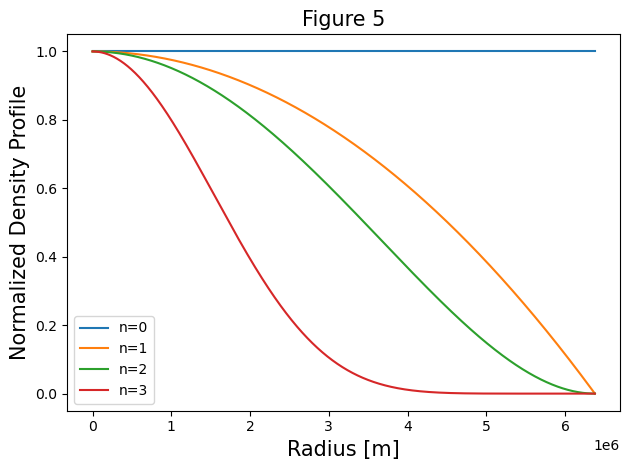

In [743]:
fig, ax1 = plt.subplots(1,1)

for i in range(len(n)):
    density_prof = density(r, n[i])
    ax1.plot(r, density_prof, label = f"n={i}")



ax1.set_ylabel("Normalized Density Profile", fontsize=15)
ax1.set_xlabel("Radius [m]", fontsize=15)
ax1.set_title("Figure 5", fontsize=15)
ax1.legend()

fig.tight_layout()
fig.savefig("Fig 5")

In [744]:
n = [0, 1, 2, 9]
r = np.linspace(0, Re, 10000)

def rho_integrand(r, n):
    return 4*np.pi * ((1-(r**2/Re**2))**n) * r**2

def rho(r, n):
    rho_soln, rho_err = quad(rho_integrand, 0, Re, args=(n,))
    rho_n = Me/rho_soln
    return rho_n * (1-(r**2/Re**2))**n

def mass_integrand(r, n):
    return rho(r, n) * 4*np.pi * r**2

def force(r, n):
    M_r, M_r_err = quad(mass_integrand, 0, r, args=(n,))
    return G*M_r / r**2


/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_7127/238190804.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r / r**2


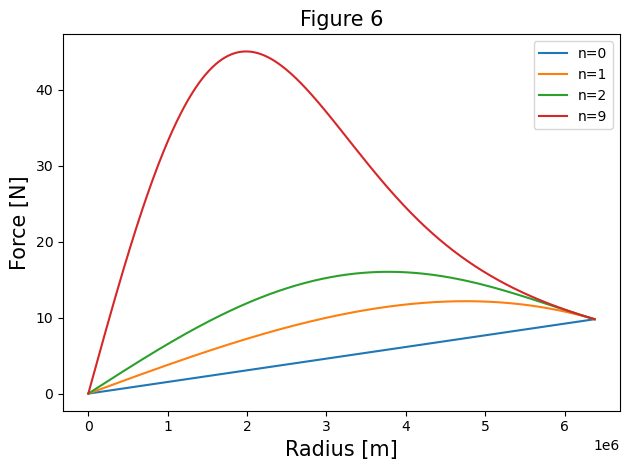

In [745]:
fig, ax1 = plt.subplots(1,1)
force_profs = {}

for i in n:
    force_profs[i] = np.array([force(j, i) for j in r])
    ax1.plot(r, force_profs[i], label = f"n={i}")



ax1.set_ylabel("Force [N]", fontsize=15)
ax1.set_xlabel("Radius [m]", fontsize=15)
ax1.set_title("Figure 6", fontsize=15)
ax1.legend()

fig.tight_layout()
fig.savefig("Fig 6")

In [746]:
n_val2 = 2

def dvdt2(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -force(y,n_val2)
    return np.array((dydt, dvdt))

for i in range(len(n)):
    accel = np.zeros(len(r))
    for j in range(len(r)):
        accel[j] = force(r[j], n[i])



# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [Re,0]

time_vals = np.linspace(t0,tf,1000)

soln2 = scipy.integrate.solve_ivp(fun = dvdt2, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln2)

/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_7127/238190804.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r / r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -5.614e+06 -5.656e+06]
            [ 0.000e+00 -9.808e+01 ... -4.244e+03 -4.121e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 254
     njev: 0
      nlu: 0


In [747]:
n_val0 = 0

def dvdt0(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -force(y,n_val0)
    return np.array((dydt, dvdt))

for i in range(len(n)):
    accel = np.zeros(len(r))
    for j in range(len(r)):
        accel[j] = force(r[j], n[i])



# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [Re,0]

time_vals = np.linspace(t0,tf,1000)

soln0 = scipy.integrate.solve_ivp(fun = dvdt0, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln0)

/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_7127/238190804.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r / r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ...  6.273e+06  6.287e+06]
            [ 0.000e+00 -9.808e+01 ...  1.422e+03  1.325e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 128
     njev: 0
      nlu: 0


In [748]:
n_val1 = 1

def dvdt1(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -force(y,n_val1)
    return np.array((dydt, dvdt))

for i in range(len(n)):
    accel = np.zeros(len(r))
    for j in range(len(r)):
        accel[j] = force(r[j], n[i])



# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [Re,0]

time_vals = np.linspace(t0,tf,1000)

soln1 = scipy.integrate.solve_ivp(fun = dvdt1, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln1)

/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_7127/238190804.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r / r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -1.937e+06 -2.034e+06]
            [ 0.000e+00 -9.808e+01 ... -9.725e+03 -9.653e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 200
     njev: 0
      nlu: 0


In [749]:
n_val9 = 9

def dvdt9(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -force(y,n_val9)
    return np.array((dydt, dvdt))

for i in range(len(n)):
    accel = np.zeros(len(r))
    for j in range(len(r)):
        accel[j] = force(r[j], n[i])



# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [Re,0]

time_vals = np.linspace(t0,tf,1000)

soln9 = scipy.integrate.solve_ivp(fun = dvdt9, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln9)

/var/folders/nw/jsrx3nf105q8sbvdnnd3ydrw0000gn/T/ipykernel_7127/238190804.py:17: RuntimeWarning: invalid value encountered in scalar divide
  return G*M_r / r**2


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.001e+01 ...  9.990e+03  1.000e+04]
        y: [[ 6.378e+06  6.378e+06 ... -3.953e+06 -3.865e+06]
            [ 0.000e+00 -9.808e+01 ...  8.595e+03  8.850e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 356
     njev: 0
      nlu: 0


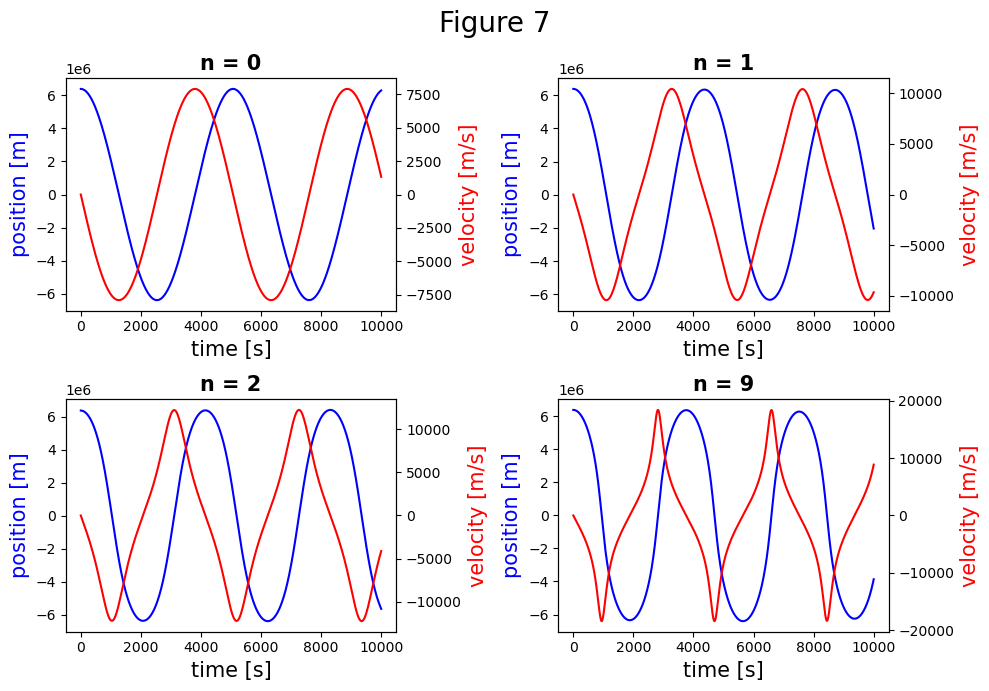

In [750]:
fig, ax1 = plt.subplots(2,2, figsize=(10, 7))
ax2 = ax1[1,0].twinx()

ax1[1,0].plot(soln2.t, soln2.y[0], "-", label="position", c="blue")
ax2.plot(soln2.t, soln2.y[1], "-", label="velocity", c="red")

ax1[1,0].set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1[1,0].set_xlabel("time [s]", fontsize=15)
ax2.set_title("n = 2", fontsize=15,fontweight = "heavy")




ax2 = ax1[0,0].twinx()

ax1[0,0].plot(soln0.t, soln0.y[0], "-", label="position", c="blue")
ax2.plot(soln0.t, soln0.y[1], "-", label="velocity", c="red")

ax1[0,0].set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1[0,0].set_xlabel("time [s]", fontsize=15)
ax2.set_title("n = 0", fontsize=15,fontweight = "heavy")




ax2 = ax1[0,1].twinx()

ax1[0,1].plot(soln1.t, soln1.y[0], "-", label="position", c="blue")
ax2.plot(soln1.t, soln1.y[1], "-", label="velocity", c="red")

ax1[0,1].set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1[0,1].set_xlabel("time [s]", fontsize=15)
ax2.set_title("n = 1", fontsize=15,fontweight = "heavy")





ax2 = ax1[1,1].twinx()

ax1[1,1].plot(soln9.t, soln9.y[0], "-", label="position", c="blue")
ax2.plot(soln9.t, soln9.y[1], "-", label="velocity", c="red")

ax1[1,1].set_ylabel("position [m]", fontsize=15, c="blue")
ax2.set_ylabel("velocity [m/s]", fontsize=15, c="red")
ax1[1,1].set_xlabel("time [s]", fontsize=15)
ax2.set_title("n = 9", fontsize=15,fontweight = "heavy")







fig.suptitle("Figure 7", fontsize=20)
fig.tight_layout()
fig.savefig("Fig 7")

In [751]:
def event(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = dvdt0, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event, rtol=1e-10)


events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"The mass reaches the center of Earth with no drag at {events[0]} seconds with a speed of {events[1]} m/s")

The mass reaches the center of Earth with no drag at 1267.342799916597 seconds with a speed of -7905.277129564454 m/s


In [752]:
def event(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = dvdt1, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event, rtol=1e-10)


events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"The mass reaches the center of Earth with no drag at {events[0]} seconds with a speed of {events[1]} m/s")

The mass reaches the center of Earth with no drag at 1096.5129862540334 seconds with a speed of -10457.698665135844 m/s


In [753]:
def event(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = dvdt2, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event, rtol=1e-10)


events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"The mass reaches the center of Earth with no drag at {events[0]} seconds with a speed of {events[1]} m/s")

The mass reaches the center of Earth with no drag at 1035.0756471595018 seconds with a speed of -12182.850259003093 m/s


In [754]:
def event(t,s):
    return s[0]

soln = scipy.integrate.solve_ivp(fun = dvdt9, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event, rtol=1e-10)


events = [soln.t_events[0][0], soln.y_events[0][0][1]]
print(f"The mass reaches the center of Earth with no drag at {events[0]} seconds with a speed of {events[1]} m/s")

The mass reaches the center of Earth with no drag at 943.7775313240655 seconds with a speed of -18370.67377035088 m/s


### Part 6
---

In [755]:
am = G*Mm/(Rm**2)

def dvdt(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -(am*y/Rm)
    return np.array((dydt, dvdt))

# Initial and final t values
t0 = 0 # s
tf = 10000 # s

# initial conditions
s0 = [Rm,0]

time_vals = np.linspace(t0,tf,500)

soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals)
print(soln)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.004e+01 ...  9.980e+03  1.000e+04]
        y: [[ 1.738e+06  1.738e+06 ... -1.694e+06 -1.687e+06]
            [ 0.000e+00 -3.254e+01 ...  3.734e+02  4.050e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 104
     njev: 0
      nlu: 0


In [756]:
def event(t,s):
    return s[0]


soln = scipy.integrate.solve_ivp(fun = dvdt, t_span = (t0, tf), y0 = s0, t_eval = time_vals, events = event)
events = [soln.t_events[0][0], soln.y_events[0][0][0]]
print(f"The mass reaches the other side of the moon at {events[0]} seconds")

The mass reaches the other side of the moon at 1624.90599197365 seconds


In [757]:
den_e = Me / (4/3 * np.pi * Re**3)
den_m = Mm / (4/3 * np.pi * Rm**3)
den_ratio = den_m/den_e

print(f"Density of Earth = {den_e} kg/m^3")
print(f"Density of Moon = {den_m} kg/m^3")
print(f"Density of moon to Earth = {den_ratio}")

Density of Earth = 5494.867409551201 kg/m^3
Density of Moon = 3341.753803870318 kg/m^3
Density of moon to Earth = 0.6081591337511926


$\frac{d^2y}{dt^2}=\frac{-ay}{R}$ 


$y(t)=Y_0cos(\omega t) + V_0sin(\omega t)$  where  $\omega=\sqrt{(\frac{a}{R})}$


$ Y_0cos(\omega t) = 0$  when  $\omega t = \frac{\pi}{2}$ so $t=\sqrt{\frac{\pi^2 R}{4a}}$

$ a = G\times\frac{4\rho\pi R}{3} $

$t_\text{center} = \sqrt{\frac{3\pi}{16G\rho}}$

In [758]:
t_center = np.sqrt((3*np.pi) / (16*G*den_m))
print(f"t_center = {t_center}s")

t_center = 1625.120186741467s
